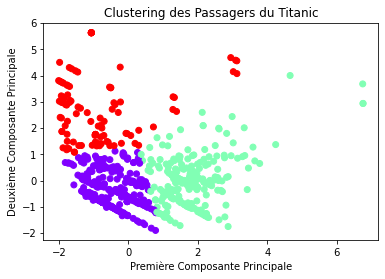

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from os.path import join
# Charger les données
titanic_data = pd.read_csv(join("..","data","titanic.csv") )

# Sélectionner les caractéristiques pertinentes pour le clustering
selected_features = ['Pclass', 'Age', 'Fare', 'SibSp', 'Parch']

# Remplacer les valeurs manquantes par la moyenne
titanic_data[selected_features] = titanic_data[selected_features].fillna(titanic_data[selected_features].mean())

# Standardiser les données
scaler = StandardScaler()
scaled_data = scaler.fit_transform(titanic_data[selected_features])

# Réduire la dimension avec PCA (facultatif)
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

# Appliquer K-Means avec un nombre de clusters de votre choix
kmeans = KMeans(n_clusters=3, random_state=0)
cluster_labels = kmeans.fit_predict(reduced_data)

# Visualisation des clusters
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=cluster_labels, cmap='rainbow')
plt.xlabel('Première Composante Principale')
plt.ylabel('Deuxième Composante Principale')
plt.title('Clustering des Passagers du Titanic')
plt.show()


                Pclass        Age       Fare     SibSp     Parch
Cluster Name                                                    
Cluster A     2.759058  28.396923  12.271134  0.224638  0.121377
Cluster B     1.115880  39.592161  72.687035  0.369099  0.296137
Cluster C     2.584906  14.734326  47.020794  2.415094  1.924528


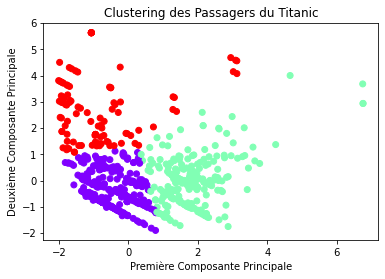

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Charger les données du Titanic
# titanic_data = pd.read_csv('titanic.csv')

# Sélectionner les caractéristiques pertinentes pour le clustering
selected_features = ['Pclass', 'Age', 'Fare', 'SibSp', 'Parch']

# Remplacer les valeurs manquantes par la moyenne
titanic_data[selected_features] = titanic_data[selected_features].fillna(titanic_data[selected_features].mean())

# Standardiser les données
scaler = StandardScaler()
scaled_data = scaler.fit_transform(titanic_data[selected_features])

# Réduire la dimension avec PCA (facultatif)
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

# Appliquer K-Means avec un nombre de clusters de votre choix
kmeans = KMeans(n_clusters=3, random_state=0)
cluster_labels = kmeans.fit_predict(reduced_data)

# Attribuer des noms/étiquettes aux clusters
titanic_data['Cluster'] = cluster_labels
cluster_names = {
    0: 'Cluster A',
    1: 'Cluster B',
    2: 'Cluster C'
}
titanic_data['Cluster Name'] = titanic_data['Cluster'].map(cluster_names)

# Analyser les statistiques des clusters
cluster_stats = titanic_data.groupby('Cluster Name')[selected_features].mean()
print(cluster_stats)

# Visualisation des clusters
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=cluster_labels, cmap='rainbow')
plt.xlabel('Première Composante Principale')
plt.ylabel('Deuxième Composante Principale')
plt.title('Clustering des Passagers du Titanic')
plt.show()
